<a href="https://colab.research.google.com/github/NavinkumarJ/mnist-classification/blob/main/Ex03_minist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:

Register Number:

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

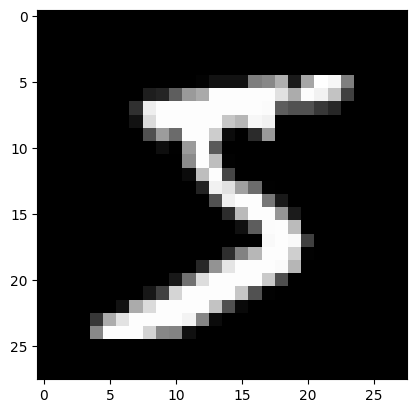

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape

(60000, 10)

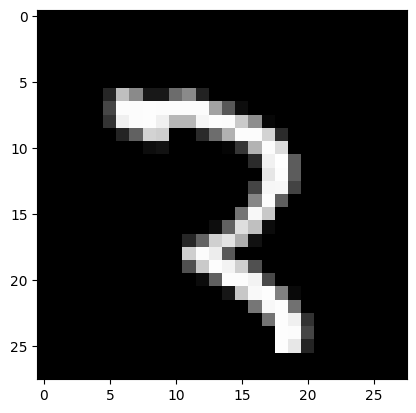

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name:

Register Number:

In [21]:
model = keras.Sequential()
model.add (layers. Input (shape=(28,28,1)))
model.add (layers. Conv2D (filters=32, kernel_size=(9,9), activation='relu'))
model.add (layers. MaxPool2D (pool_size=(2,2)))
model.add (layers. Flatten())
model.add (layers. Dense (32, activation='relu'))
model.add (layers. Dense (16, activation='relu'))
model.add (layers. Dense (8, activation='relu'))
model.add (layers. Dense (10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        2624      
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 32)                102432    
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                        

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=6,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/6
938/938 [==============================] - 38s 38ms/step - loss: 0.3916 - accuracy: 0.8773 - val_loss: 0.0969 - val_accuracy: 0.9715
Epoch 2/6
938/938 [==============================] - 34s 37ms/step - loss: 0.0916 - accuracy: 0.9731 - val_loss: 0.0725 - val_accuracy: 0.9778
Epoch 3/6
938/938 [==============================] - 36s 39ms/step - loss: 0.0650 - accuracy: 0.9810 - val_loss: 0.0479 - val_accuracy: 0.9847
Epoch 4/6
938/938 [==============================] - 34s 37ms/step - loss: 0.0498 - accuracy: 0.9850 - val_loss: 0.0449 - val_accuracy: 0.9862
Epoch 5/6
938/938 [==============================] - 35s 37ms/step - loss: 0.0420 - accuracy: 0.9871 - val_loss: 0.0508 - val_accuracy: 0.9833
Epoch 6/6
249/938 [======>.......................] - ETA: 25s - loss: 0.0336 - accuracy: 0.9895

In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.391566,0.877333,0.096873,0.9715
1,0.091612,0.973100,0.072473,0.9778
2,0.065036,0.981000,0.047878,0.9847
3,0.049807,0.984967,0.044916,0.9862
4,0.042050,0.987133,0.050753,0.9833


NAVIN KUMAR J
212222240071


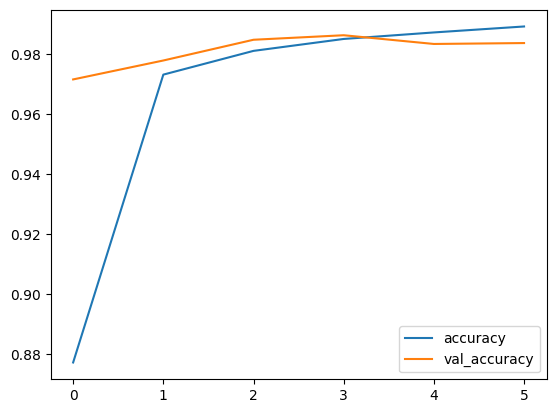

In [41]:
metrics[['accuracy','val_accuracy']].plot()
print("NAVIN KUMAR J\n212222240071")

NAVIN KUMAR J
212222240071


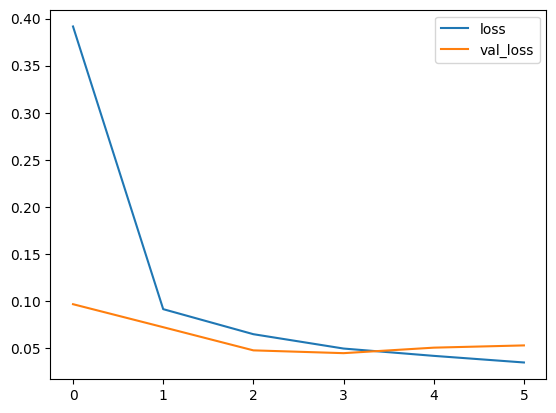

In [42]:
metrics[['loss','val_loss']].plot()
print("NAVIN KUMAR J\n212222240071")

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [44]:
print("NAVIN KUMAR J\n212222240071")
print(confusion_matrix(y_test,x_test_predictions))

NAVIN KUMAR J
212222240071
[[ 969    0    0    0    0    2    0    1    4    4]
 [   0 1123    1    1    0    1    1    1    5    2]
 [   2    4 1008    7    2    0    0    6    3    0]
 [   0    0    0 1008    0    0    0    0    1    1]
 [   0    0    2    0  964    0    0    0    2   14]
 [   1    0    0   10    0  878    0    0    0    3]
 [   6    2    0    1    2   33  911    0    3    0]
 [   0    3    1    1    0    0    0 1013    4    6]
 [   1    1    2    5    0    2    0    0  958    5]
 [   0    0    0    1    1    2    0    0    1 1004]]


In [45]:
print("NAVIN KUMAR J\n212222240071")
print(classification_report(y_test,x_test_predictions))

NAVIN KUMAR J
212222240071
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.96      0.98      0.97       892
           6       1.00      0.95      0.97       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.97      1.00      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [32]:
img = image.load_img('nine.png')

In [33]:
type(img)

PIL.Image.Image

In [34]:
img = image.load_img('nine.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [47]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print("NAVIN KUMAR J\n212222240071")


1/1 [==============================] - 0s 40ms/step
NAVIN KUMAR J
212222240071


In [48]:
print("NAVIN KUMAR J\n212222240071")
print(x_single_prediction)

NAVIN KUMAR J
212222240071
[4]


NAVIN KUMAR J
212222240071


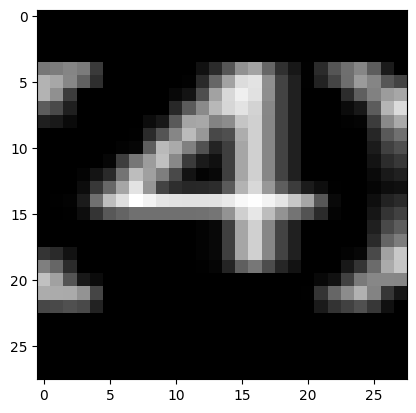

In [46]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print("NAVIN KUMAR J\n212222240071")

In [38]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [40]:
print(x_single_prediction)

[2]
